In [2]:
import IO, plotting as plotz, os
from numpy import *
from matplotlib.pyplot import *
import networkx as nx
import networkx as nx
from tqdm import tqdm_notebook as tqdm
%load_ext autoreload
%autoreload 2

In [10]:
res = {}
d = f'{os.getcwd()}/Data/use'
for file in os.listdir(d):
    if file.endswith('.pickle') and 'n=12' in file:
        t = file
        res[t] = IO.loadPickle(f'{d}/{file}')
        fig, ax = subplots();
        ax.plot(res[t]['mi'])
        degs = dict(nx.degree(res[t]['model'].graph)).values()
        ax.set_title(file)
#         fig, ax = subplots()
        degs = dict(nx.degree(res[t]['model'].graph))
#         ax.hist(degs.values())
#         ax.set_yscale('log')
        
show()

In [6]:
for key, value in tqdm( res.items () ):
    fig, ax = subplots()
    mi = value['mi']
    degs = dict ( nx.degree(value['model'].graph) )
    for n, d in degs.items():
        idx = value['model'].mapping[n]
        ax.scatter(d, mi[150, idx])
        
        ax.set_title(key)
# ax.set_xscale('log')

print(degs)
show()

NameError: name 'degs' is not defined

In [7]:
import scipy
# %matplotlib 
tmp = list(res.keys())
iii = tmp[3]
mi = res[iii]['mi']
joint = res[iii]['joint']
model = res[tmp[0]]['model']
x = arange(len(mi))
y = mi[:, 0]

ii = zeros((model.nNodes, 2))

xx = linspace(0, 400, 10000)

HH = zeros((len(xx), model.nNodes))
func = lambda x, a, b, c, d, e, f, g:   a * exp(-b * (x - c))   + d * exp( -e* (x - f))
errors = zeros((model.nNodes))


fig, ax = subplots()
for idx, i in enumerate( tqdm( mi.T) ):
    a, b = scipy.optimize.curve_fit(func, x, i, maxfev = 20000)
    
    tmp = lambda x : func(x, *a) - .1
    tmp2=lambda x : func(x, *a) - .5
    r   = scipy.optimize.root(tmp, 0)
    rr  = scipy.optimize.root(tmp2, 0)
    ii[idx, :] = r.x, rr.x
    print(rr.x, r.x)
    HH[:, idx] = tmp(xx)
    error = sqrt((func(x, *a) - i)**2).sum()
    errors[idx] = error
    
    ax.plot(xx, func(xx, *a), alpha = .2)
    ax.scatter(x, i, alpha = .2)
    ax.scatter(r.x, func(r.x, *a), marker = 's')
    ax.scatter(rr.x, func(rr.x, *a), marker = '^')
# xlim(0, 100)
ax.set_title(iii)
show()

IndexError: list index out of range

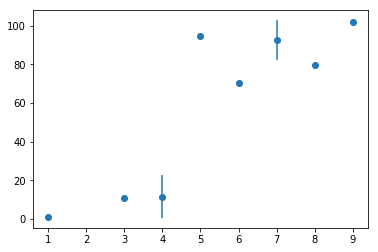

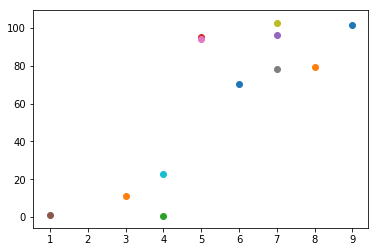

In [34]:
%matplotlib inline
degs = dict(nx.degree(model.graph))
tmp = {}
for node, d in degs.items():
    idx = model.mapping[node]
    tmp[d] = tmp.get(d, ()) + (ii[idx, 1],)

xx = zeros(len(tmp))
yy = zeros(len(tmp))
for idx, (k, v) in enumerate(tmp.items()):
    xx[idx] = mean(v)
    yy[idx] = std(v) 
xxx = array(list(tmp.keys()))
fig, ax = subplots()
ax.errorbar(xxx, xx, yerr = yy, fmt = 'o')
# ax.set_yscale('log')

fig, ax = subplots()
# ax.scatter(xxx, xx)
for node, deg in degs.items():
    idx = model.mapping[node]
    ax.scatter(deg, ii[idx, 1])
# ax.set_yscale('log')

[307.04350646 340.23743993 358.68229782 433.91450918 444.82812406
 459.38749674 462.70077808 469.88694187]


(array([2., 1., 1., 0., 0., 0., 1., 2., 0., 5.]),
 array([  0.61018694,  10.81204071,  21.01389447,  31.21574823,
         41.417602  ,  51.61945576,  61.82130953,  72.02316329,
         82.22501705,  92.42687082, 102.62872458]),
 <a list of 10 Patch objects>)

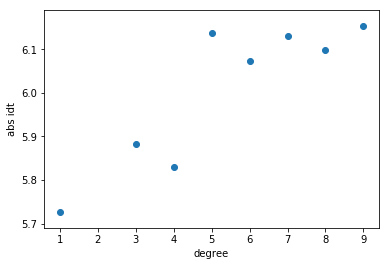

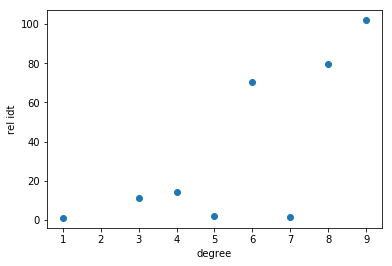

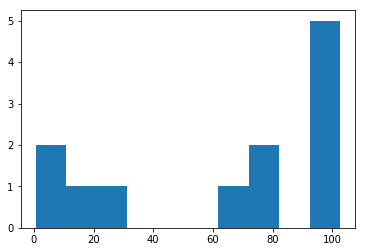

In [33]:

degs = dict(nx.degree(model.graph))
idt_deg = {}
idt_norm = {}
idt_rel  = {}
idt_rel_n= {}
for node, deg in degs.items():
    idx = model.mapping[node]
    idt_deg[deg] = idt_deg.get(deg, 0) + ii[idx, 0]
    idt_norm[deg] = idt_norm.get(deg, 0) + 1
    
    idt_rel_n[deg] = idt_rel.get(deg, 0) + 1
    idt_rel[deg] = idt_rel.get(deg, 0) + ii[idx, 1]

idts = {}
for k, v in idt_deg.items():
    idts[k] = v / idt_norm[k]
for k, v in idt_rel.items():
    idt_rel[k] = v / idt_rel_n[k]

#     ax.scatter(deg, ii[idx, 1])
fig, ax = subplots();
ax.scatter(list(idts.keys()), log(list(idts.values())))
setp(ax, **dict(xlabel = 'degree', ylabel = 'abs idt'))
fig, ax = subplots()
ax.scatter(list(idt_rel.keys()), list(idt_rel.values()))
print(sort(list(idts.values())))
setp(ax, **dict(xlabel = 'degree', ylabel = 'rel idt'))

ii[ii <0]= 0
# ax.set_yscale('log')
# ax.set_xlim(0, 30)
# ax.set_xscale('log')
fig, ax = subplots()
ax.hist(ii[:, 1])
# ax.set_yscale('log')


In [7]:
for k, v in joint.items():
    print(k,v)

(-1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1) [[[1.    0.   ]
  [1.    0.   ]
  [0.    1.   ]
  ...
  [1.    0.   ]
  [1.    0.   ]
  [1.    0.   ]]

 [[0.994 0.006]
  [1.    0.   ]
  [0.839 0.161]
  ...
  [0.966 0.034]
  [0.953 0.047]
  [0.883 0.117]]

 [[0.997 0.003]
  [0.972 0.028]
  [0.836 0.164]
  ...
  [0.934 0.066]
  [0.962 0.038]
  [0.888 0.112]]

 ...

 [[0.554 0.446]
  [0.549 0.451]
  [0.544 0.456]
  ...
  [0.543 0.457]
  [0.547 0.453]
  [0.545 0.455]]

 [[0.55  0.45 ]
  [0.554 0.446]
  [0.525 0.475]
  ...
  [0.537 0.463]
  [0.549 0.451]
  [0.554 0.446]]

 [[0.553 0.447]
  [0.545 0.455]
  [0.533 0.467]
  ...
  [0.542 0.458]
  [0.544 0.456]
  [0.564 0.436]]]
(1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1) [[[0.00e+00 1.00e+00]
  [0.00e+00 1.00e+00]
  [0.00e+00 1.00e+00]
  ...
  [0.00e+00 1.00e+00]
  [0.00e+00 1.00e+00]
  [0.00e+00 1.00e+00]]

 [[4.00e-03 9.96e-01]
  [0.00e+00 1.00e+00]
  [1.45e-01 8.55e-01]
  ...
  [2.70e-02 9.73e-01]
  [3.70e-02 9.63e-01]
  [1.09e-01 8.91e-01]]

 [[1.